<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2026-01-01 22:19:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  58.2MB/s    in 2.6s    

2026-01-01 22:19:21 (58.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



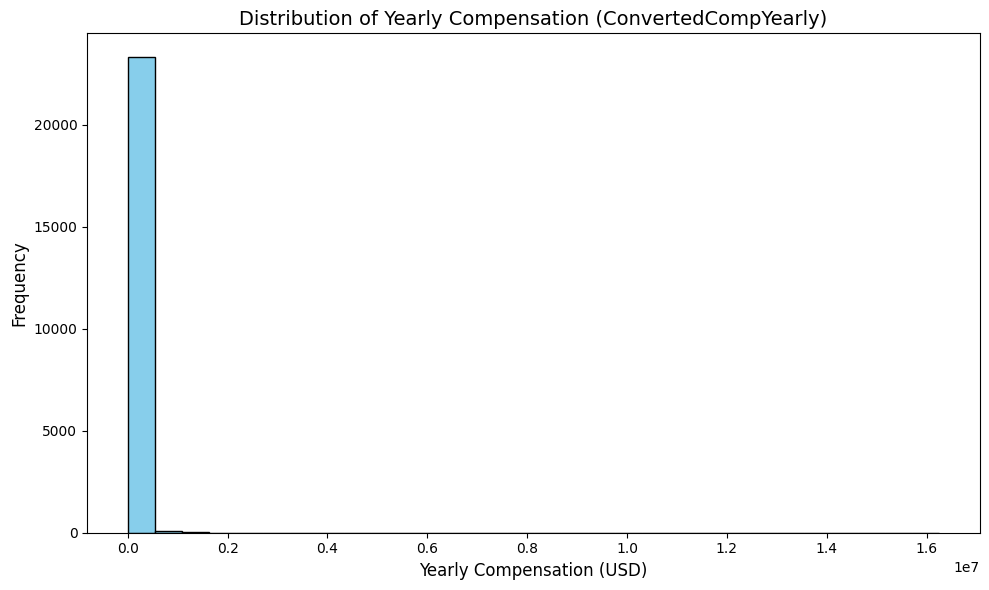

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Clean the data (convert 'ConvertedCompYearly' to numeric and handle missing values)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Step 3: Drop rows where 'ConvertedCompYearly' is missing (NaN values)
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Step 4: Plot the histogram for 'ConvertedCompYearly'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df_cleaned['ConvertedCompYearly'], bins=30, color='skyblue', edgecolor='black')

# Step 5: Add labels and title
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Step 6: Display the plot
plt.tight_layout()  # Adjust the plot to fit in the figure area
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



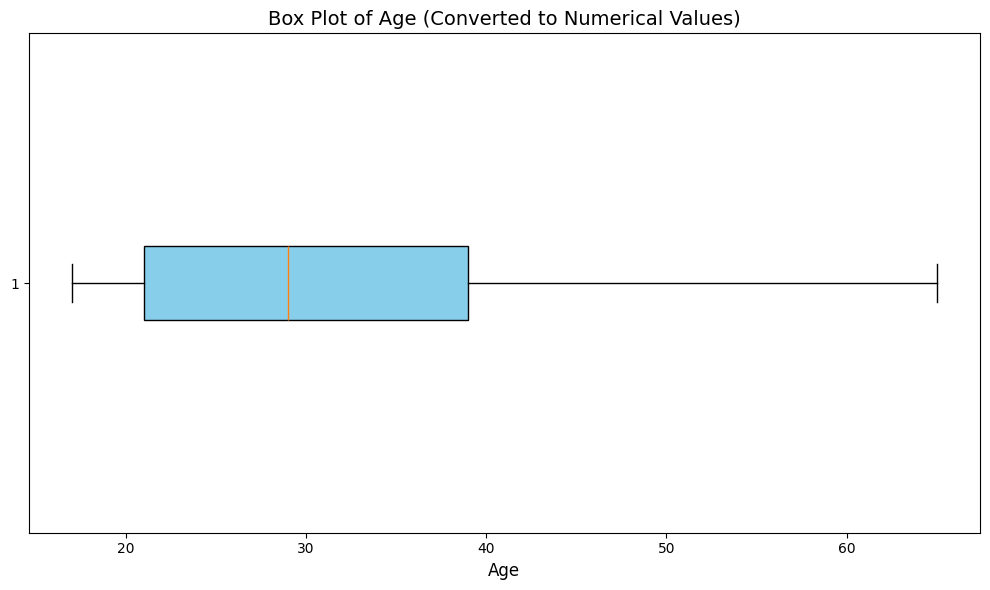

In [5]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Map the categorical age groups to numerical values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

# Apply the mapping to the 'Age' column
df['Age_numerical'] = df['Age'].map(age_mapping)

# Step 3: Clean the data (drop rows with missing or invalid 'Age_numerical' values)
df_cleaned = df.dropna(subset=['Age_numerical'])

# Step 4: Plot the box plot for Age
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['Age_numerical'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=5))

# Step 5: Add labels and title
plt.title('Box Plot of Age (Converted to Numerical Values)', fontsize=14)
plt.xlabel('Age', fontsize=12)

# Step 6: Display the plot
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



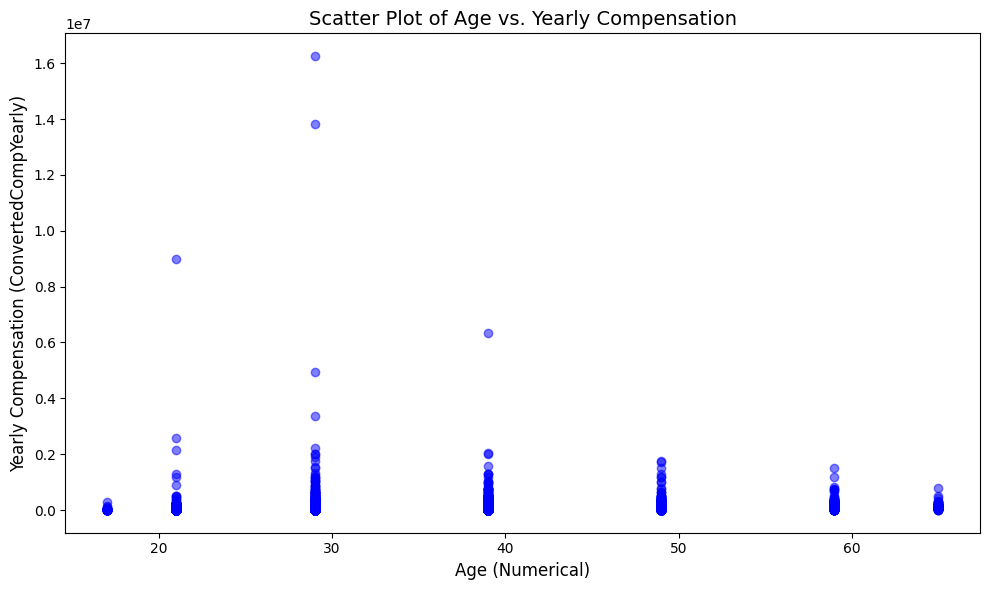

In [6]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Map the categorical age groups to numerical values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

# Apply the mapping to the 'Age' column
df['Age_numerical'] = df['Age'].map(age_mapping)

# Step 3: Clean the data (drop rows with missing or invalid 'Age_numerical' or 'ConvertedCompYearly')
df_cleaned = df.dropna(subset=['Age_numerical', 'ConvertedCompYearly'])

# Step 4: Create a scatter plot to visualize the relationship between Age and Compensation
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age_numerical'], df_cleaned['ConvertedCompYearly'], alpha=0.5, color='blue')

# Step 5: Add labels and title
plt.title('Scatter Plot of Age vs. Yearly Compensation', fontsize=14)
plt.xlabel('Age (Numerical)', fontsize=12)
plt.ylabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)

# Step 6: Display the plot
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


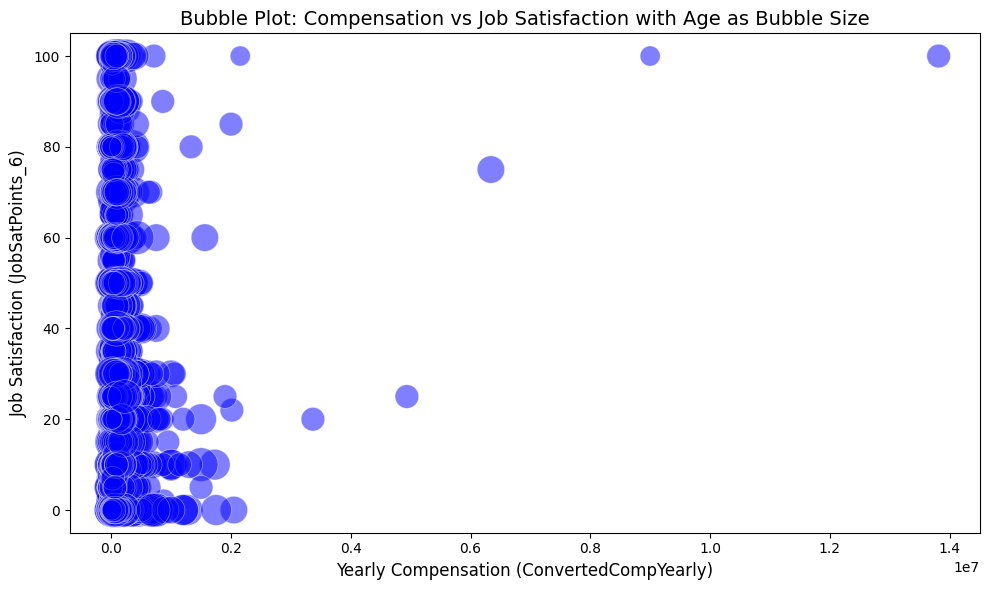

In [7]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Map the categorical age groups to numerical values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

# Apply the mapping to the 'Age' column
df['Age_numerical'] = df['Age'].map(age_mapping)

# Step 3: Clean the data (drop rows with missing or invalid 'Age_numerical', 'ConvertedCompYearly', or 'JobSatPoints_6')
df_cleaned = df.dropna(subset=['Age_numerical', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Step 4: Create a bubble plot (scatter plot with size representing age)
plt.figure(figsize=(10, 6))

# Set the bubble size as a function of age (scaled)
bubble_size = df_cleaned['Age_numerical'] * 10  # Multiply by a factor to make bubbles visible

# Create the scatter plot with bubble size
plt.scatter(df_cleaned['ConvertedCompYearly'], df_cleaned['JobSatPoints_6'], 
            s=bubble_size, alpha=0.5, color='blue', edgecolors='w', linewidth=0.5)

# Step 5: Add labels and title
plt.title('Bubble Plot: Compensation vs Job Satisfaction with Age as Bubble Size', fontsize=14)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)

# Step 6: Display the plot
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



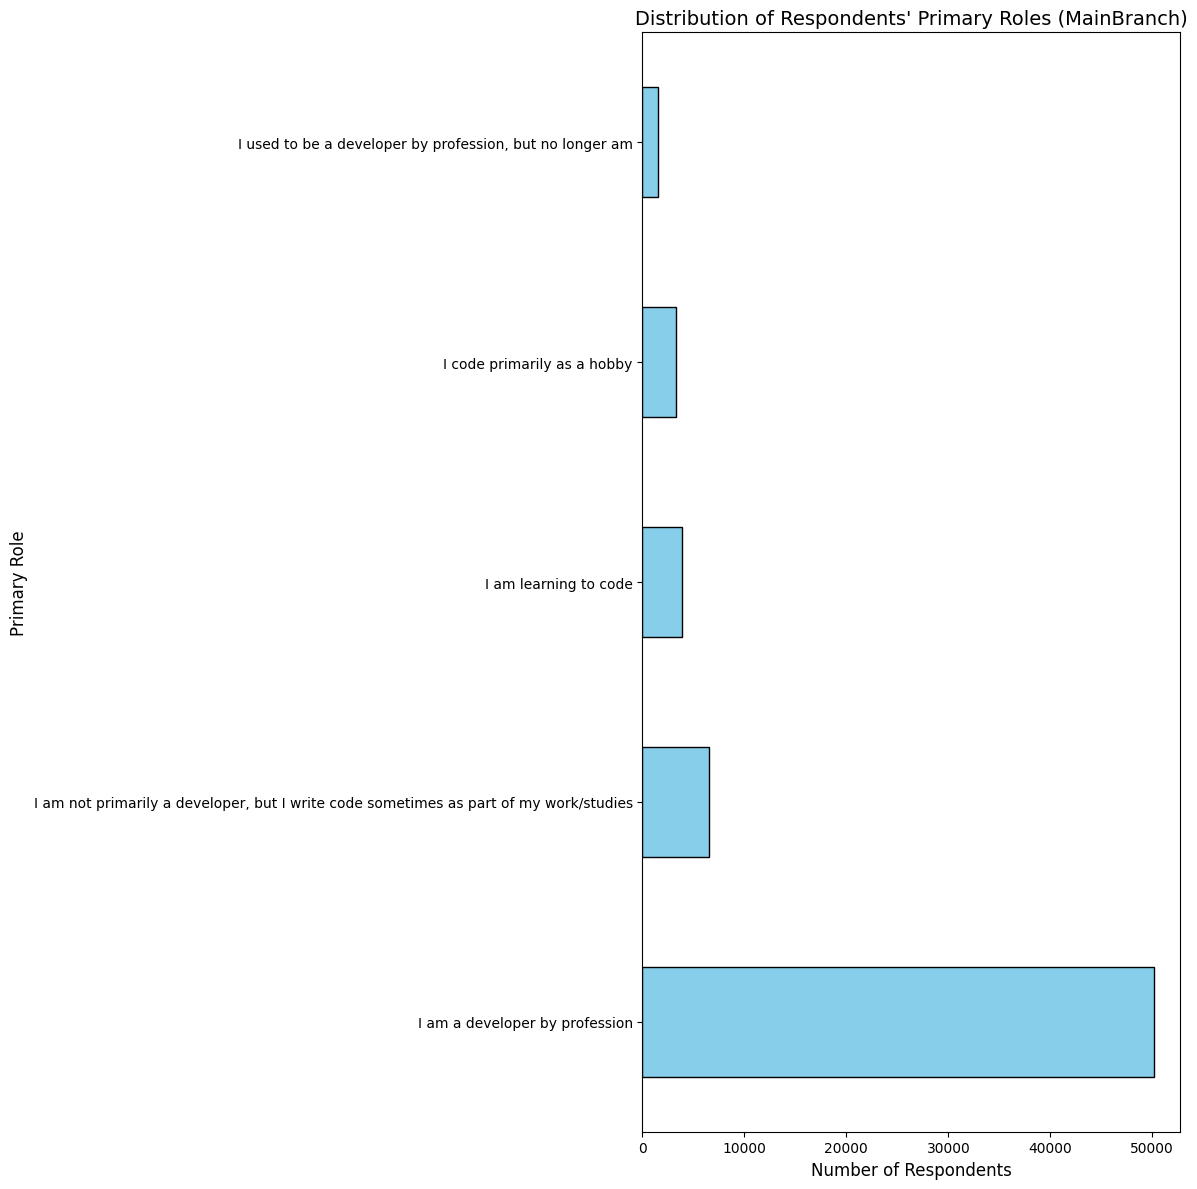

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Clean data by ensuring that there are no missing values in 'MainBranch'
df_cleaned = df.dropna(subset=['MainBranch'])

# Step 3: Count the occurrences of each category in 'MainBranch'
mainbranch_counts = df_cleaned['MainBranch'].value_counts()

# Step 4: Create a horizontal bar chart to visualize the distribution
plt.figure(figsize=(12, 12))
mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Step 5: Add labels and title
plt.title('Distribution of Respondents\' Primary Roles (MainBranch)', fontsize=14)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Primary Role', fontsize=12)

# Step 6: Display the chart
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



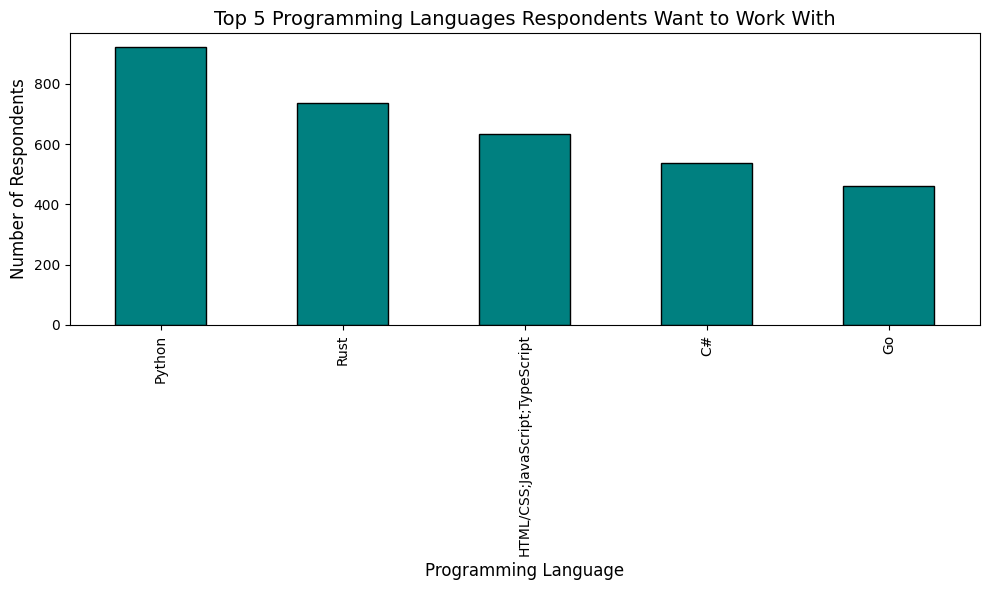

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Clean data by ensuring that there are no missing values in 'LanguageWantToWorkWith'
df_cleaned = df.dropna(subset=['LanguageWantToWorkWith'])

# Step 3: Count the occurrences of each language in 'LanguageWantToWorkWith'
language_counts = df_cleaned['LanguageWantToWorkWith'].value_counts()

# Step 4: Select the top 5 most desired languages
top_languages = language_counts.head(5)

# Step 5: Create a vertical bar chart to visualize the top 5 languages
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar', color='teal', edgecolor='black')

# Step 6: Add labels and title
plt.title('Top 5 Programming Languages Respondents Want to Work With', fontsize=14)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Step 7: Display the chart
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


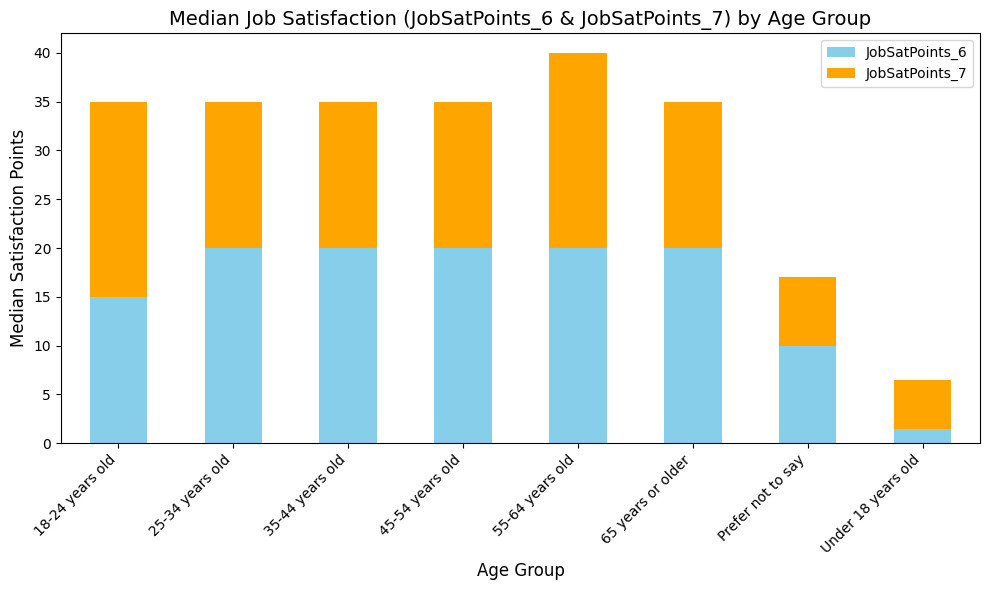

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Clean the data - ensure 'JobSatPoints_6', 'JobSatPoints_7', and 'Age' are valid
df_cleaned = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Age'])

# Step 3: Group by Age and calculate the median for both 'JobSatPoints_6' and 'JobSatPoints_7'
age_group_satisfaction = df_cleaned.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 4: Create the stacked bar chart
ax = age_group_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])

# Step 5: Add labels and title
plt.title('Median Job Satisfaction (JobSatPoints_6 & JobSatPoints_7) by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Satisfaction Points', fontsize=12)

# Step 6: Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Step 7: Display the plot
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



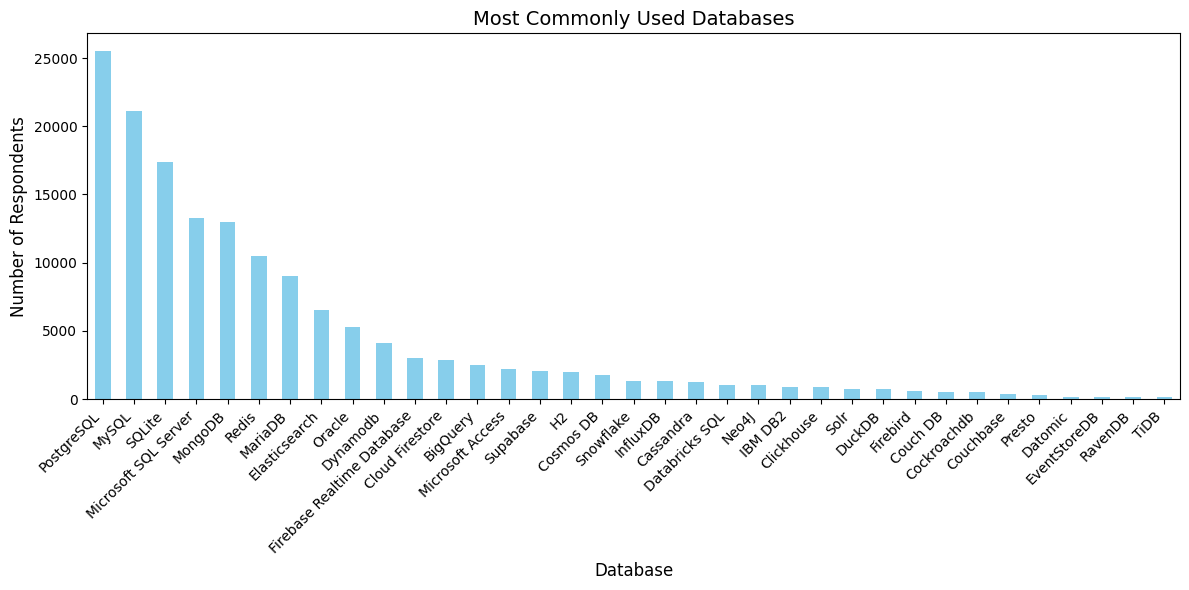

In [14]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Clean the data - ensure 'DatabaseHaveWorkedWith' is valid and not missing
df_cleaned = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Step 3: Count the occurrences of each database
# Split the 'DatabaseHaveWorkedWith' column to handle multiple databases per respondent
databases = df_cleaned['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack()

# Count the occurrences of each database
database_counts = databases.value_counts()

# Step 4: Create the bar chart
plt.figure(figsize=(12, 6))
database_counts.plot(kind='bar', color='skyblue')

# Step 5: Add labels and title
plt.title('Most Commonly Used Databases', fontsize=14)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Step 6: Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Step 7: Display the plot
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



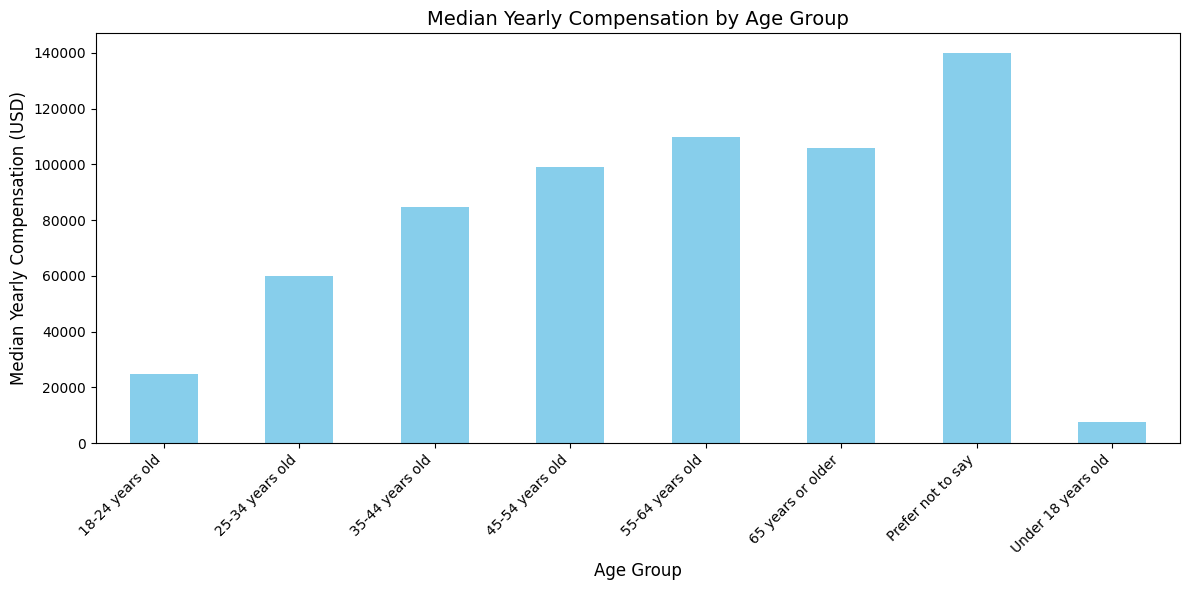

In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Clean the data - ensure 'ConvertedCompYearly' and 'Age' are valid
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'Age'])

# Step 3: Group by Age and calculate the median ConvertedCompYearly for each age group
age_group_median_comp = df_cleaned.groupby('Age')['ConvertedCompYearly'].median()

# Step 4: Create the grouped bar chart
plt.figure(figsize=(12, 6))
age_group_median_comp.plot(kind='bar', color='skyblue')

# Step 5: Add labels and title
plt.title('Median Yearly Compensation by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Yearly Compensation (USD)', fontsize=12)

# Step 6: Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Step 7: Display the plot
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



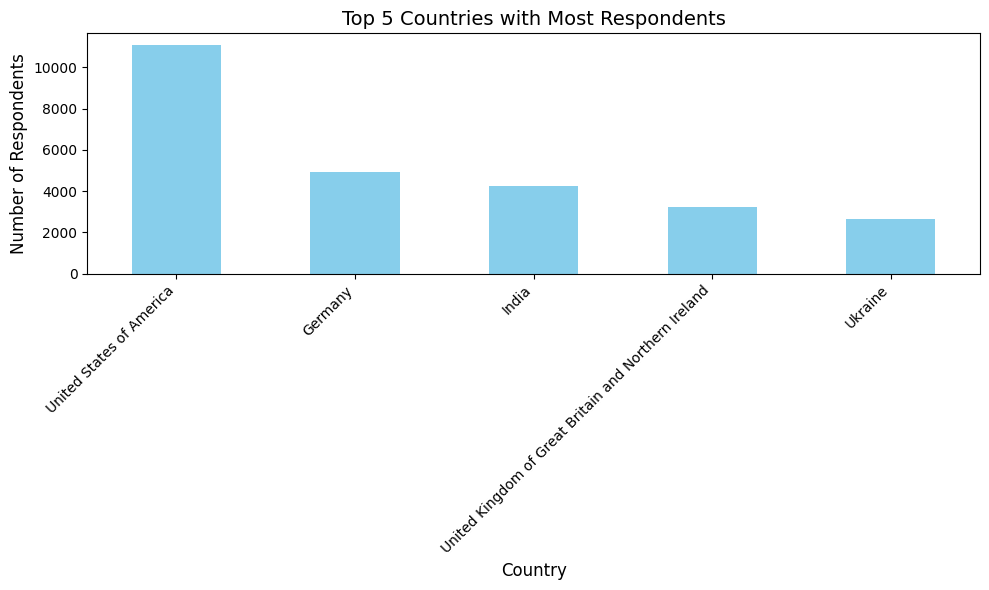

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Clean the data - ensure 'Country' is valid (i.e., no missing values)
df_cleaned = df.dropna(subset=['Country'])

# Step 3: Group by Country and count the number of respondents for each country
country_counts = df_cleaned['Country'].value_counts()

# Step 4: Select the top 5 countries with the most respondents
top_5_countries = country_counts.head(5)

# Step 5: Create the bar chart
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='skyblue')

# Step 6: Add labels and title
plt.title('Top 5 Countries with Most Respondents', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Step 7: Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Step 8: Display the plot
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
